In [ ]:
import pandas as pd
import numpy as np
import os
import random
import shutil
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  GlobalAveragePooling2D
from tensorflow.keras.backend import clear_session

import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
import zipfile
import io

In [ ]:


# # Replace 'your_file.zip' with the name of your zip file
# zip_file = '/content/drive/MyDrive/datasets/American Sign Language/RGB-depth/archive.zip'

# # Extract the contents
# with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/datasets/American Sign Language/RGB-depth/unzipped')


In [ ]:
import os

# List the extracted files
extracted_files = os.listdir('/content/drive/MyDrive/datasets/American Sign Language/RGB-depth/unzipped/dataset5/A')
print("Extracted files:", extracted_files)


Extracted files: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']


In [ ]:
import os

# Path to the directory containing the subfolders
dataset_path = '/content/drive/MyDrive/datasets/American Sign Language/RGB-depth/unzipped/dataset5/A'

# Iterate over subfolders
for root, dirs, files in os.walk(dataset_path):
    # Iterate over subdirectories
    for directory in dirs:
        subdir_path = os.path.join(root, directory)
        # Count the number of images in the subfolder
        num_images = len([file for file in os.listdir(subdir_path) if file.endswith('.jpg') or file.endswith('.png')])
        # Print the subfolder name and number of images
        print(f"Subfolder: {directory}, Number of Images: {num_images}")

Subfolder: a, Number of Images: 1055
Subfolder: b, Number of Images: 1031
Subfolder: c, Number of Images: 1113
Subfolder: d, Number of Images: 1071
Subfolder: e, Number of Images: 1047
Subfolder: f, Number of Images: 1037
Subfolder: g, Number of Images: 1055
Subfolder: h, Number of Images: 1045
Subfolder: i, Number of Images: 761
Subfolder: k, Number of Images: 0
Subfolder: l, Number of Images: 0
Subfolder: m, Number of Images: 30


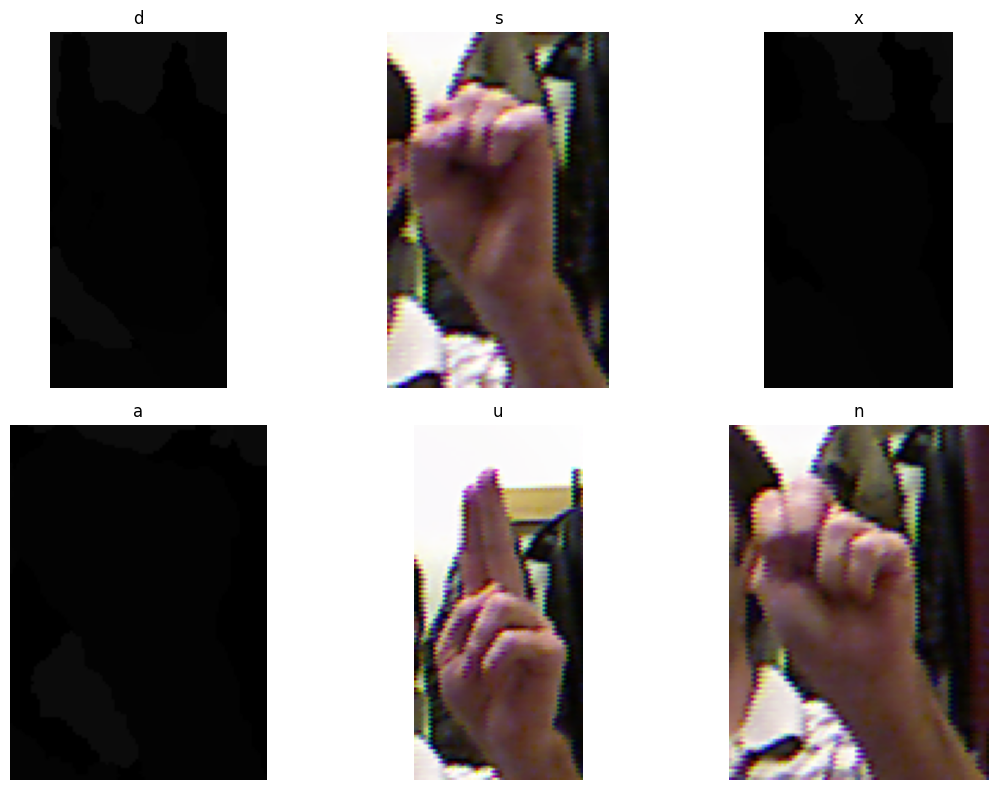

In [ ]:
# Path to the directory containing subfolders
dataset_path = '/content/drive/MyDrive/datasets/American Sign Language/RGB-depth/unzipped/dataset5/A'
# Function to get a list of image files from subdirectories
def get_image_files(directory):
    image_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):  # Adjust file extensions as needed
                image_files.append(os.path.join(root, file))
    return image_files

# Sample 6 images randomly
sampled_images = random.sample(get_image_files(dataset_path), 6)

# Plot the images with labels
plt.figure(figsize=(12, 8))
for i, image_path in enumerate(sampled_images, 1):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.axis('off')
    # Extract label from the image path
    label = os.path.basename(os.path.dirname(image_path))
    plt.title(label)
plt.tight_layout()
plt.show()

In [ ]:
import os
import shutil
import random

# Set the path to the directory containing your data
data_directory = dataset_path

# Set the path to the directory where you want to save the samples
sample_directory = "/content/drive/MyDrive/datasets/American Sign Language/RGB-depth/unzipped/dataset5/sample_directory"

# Create the sample directory if it doesn't exist
if not os.path.exists(sample_directory):
    os.makedirs(sample_directory)

# Loop through each directory in the data directory
for directory in os.listdir(data_directory):
    directory_path = os.path.join(data_directory, directory)

    # Create a subdirectory in the sample directory for the current directory
    sample_subdirectory = os.path.join(sample_directory, directory)
    os.makedirs(sample_subdirectory, exist_ok=True)

    # Get a list of files in the current directory
    files = os.listdir(directory_path)

    # Randomly select 100 files (samples)
    sample_files = random.sample(files, min(100, len(files)))

    # Copy the selected files to the sample subdirectory
    for file in sample_files:
        source_file = os.path.join(directory_path, file)
        destination_file = os.path.join(sample_subdirectory, file)
        shutil.copyfile(source_file, destination_file)


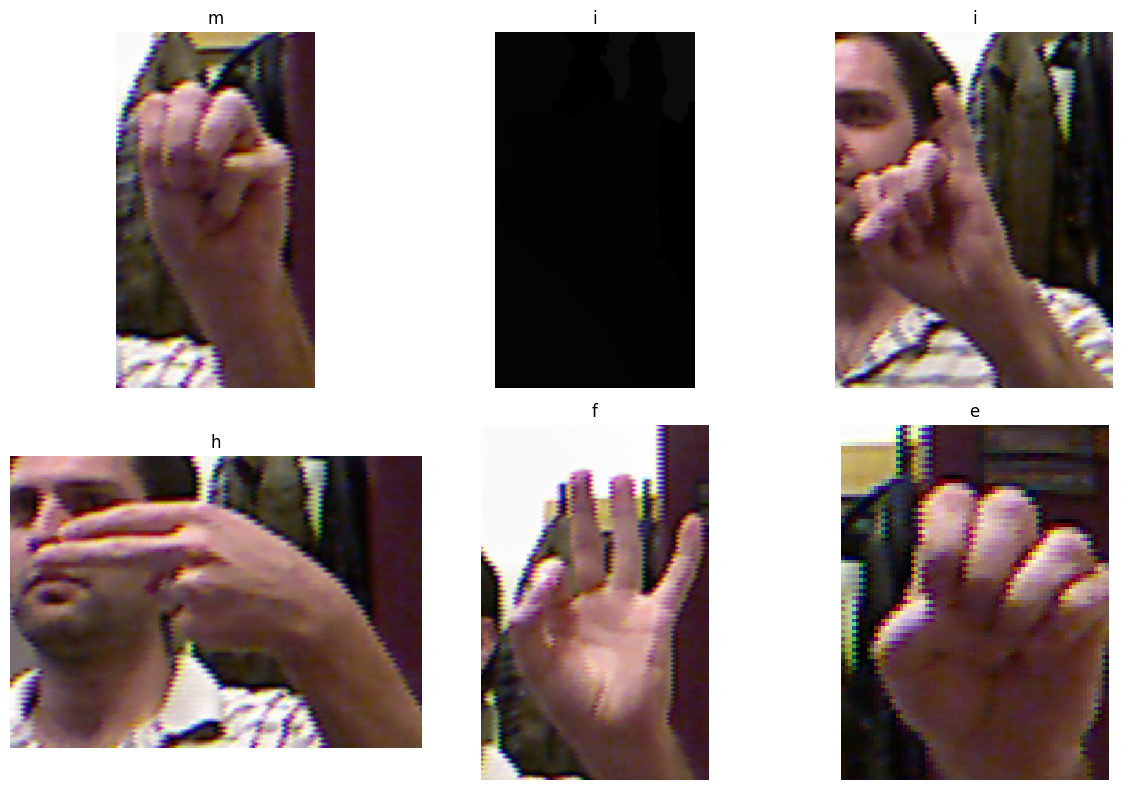

In [ ]:
# Path to the directory containing subfolders
sample_directory = "/content/drive/MyDrive/datasets/American Sign Language/RGB-depth/unzipped/dataset5/sample_directory"
# Function to get a list of image files from subdirectories
def get_image_files(directory):
    image_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):  # Adjust file extensions as needed
                image_files.append(os.path.join(root, file))
    return image_files

# Sample 6 images randomly
sampled_images = random.sample(get_image_files(sample_directory), 6)

# Plot the images with labels
plt.figure(figsize=(12, 8))
for i, image_path in enumerate(sampled_images, 1):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.axis('off')
    # Extract label from the image path
    label = os.path.basename(os.path.dirname(image_path))
    plt.title(label)
plt.tight_layout()
plt.show()

In [ ]:
import os
import shutil
import random

# Define paths
original_directory = '/content/drive/MyDrive/datasets/American Sign Language/RGB-depth/unzipped/dataset5/A/'
sample_directory = '/content/drive/MyDrive/datasets/American Sign Language/RGB-depth/unzipped/dataset5/sample_dir/'

# Create sample directory if it doesn't exist
os.makedirs(sample_directory, exist_ok=True)

# Function to copy color files to the sample directory
def copy_color_files(alphabet_directory, sample_alphabet_directory, num_samples):
    color_files = [file for file in os.listdir(alphabet_directory) if 'color' in file.lower()]
    random.shuffle(color_files)
    for i, file in enumerate(color_files):
        if i >= num_samples:
            break
        shutil.copy(os.path.join(alphabet_directory, file), os.path.join(sample_alphabet_directory, file))

# Iterate over each alphabet directory
for alphabet_dir in os.listdir(original_directory):
    alphabet_dir_path = os.path.join(original_directory, alphabet_dir)
    if not os.path.isdir(alphabet_dir_path):
        continue

    # Create alphabet directory in the sample directory
    sample_alphabet_directory = os.path.join(sample_directory, alphabet_dir)
    os.makedirs(sample_alphabet_directory, exist_ok=True)

    # Copy color files to the sample directory
    copy_color_files(alphabet_dir_path, sample_alphabet_directory, 200)

print("Sample directory created successfully.")


Sample directory created successfully.


In [ ]:
import os
import shutil

# Set the path to the sample directory
sample_directory = '/content/drive/MyDrive/datasets/American Sign Language/RGB-depth/unzipped/dataset5/sample_dir/'

# Loop through each directory in the sample directory
for directory in os.listdir(sample_directory):
    directory_path = os.path.join(sample_directory, directory)

    # Check if the current item in the sample directory is a directory
    if os.path.isdir(directory_path):
        # Get a list of files in the current directory
        files = os.listdir(directory_path)

        # Filter out only the image files (assuming images have extensions like .jpg, .png, etc.)
        image_files = [file for file in files if file.endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp"))]

        # If there are 0 image files in the directory, remove the directory
        if len(image_files) == 0:
            shutil.rmtree(directory_path)
            print(f"Removed empty directory: '{directory}'")


Removed empty directory: 'l'


In [ ]:
import os
import cv2

# Function to recursively iterate through directories and process images
def process_images(directory):
    # Loop through each item in the directory
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)

        # Check if the item is a directory
        if os.path.isdir(item_path):
            # If it's a directory, recursively call the function
            process_images(item_path)
        else:
            # If it's a file, check if it's an image and process it
            if item.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                try:
                    # Read the image using OpenCV
                    image = cv2.imread(item_path)

                    # Check if the image was successfully loaded
                    if image is not None:
                        # Get image dimensions
                        height, width, channels = image.shape

                        # Print image dimensions
                        print(f"Image: {item}, Height: {height}, Width: {width}, Channels: {channels}")
                    else:
                        print(f"Failed to read image: {item}")
                except Exception as e:
                    print(f"Error processing image: {item}, Error: {e}")

# Set the path to the directory containing your sample images
sample_directory = '/content/drive/MyDrive/datasets/American Sign Language/RGB-depth/unzipped/dataset5/sample_dir/'

# Call the function to process images in the sample directory
process_images(sample_directory)


Image: color_0_0256.png, Height: 120, Width: 104, Channels: 3
Image: color_0_0112.png, Height: 116, Width: 101, Channels: 3
Image: color_0_0094.png, Height: 117, Width: 92, Channels: 3
Image: color_0_0057.png, Height: 120, Width: 109, Channels: 3
Image: color_0_0369.png, Height: 133, Width: 119, Channels: 3
Image: color_0_0449.png, Height: 122, Width: 109, Channels: 3
Image: color_0_0016.png, Height: 117, Width: 104, Channels: 3
Image: color_0_0428.png, Height: 125, Width: 116, Channels: 3
Image: color_0_0379.png, Height: 130, Width: 123, Channels: 3
Image: color_0_0295.png, Height: 114, Width: 98, Channels: 3
Image: color_0_0493.png, Height: 113, Width: 66, Channels: 3
Image: color_0_0155.png, Height: 123, Width: 112, Channels: 3
Image: color_0_0267.png, Height: 122, Width: 75, Channels: 3
Image: color_0_0051.png, Height: 120, Width: 119, Channels: 3
Image: color_0_0490.png, Height: 114, Width: 76, Channels: 3
Image: color_0_0216.png, Height: 124, Width: 85, Channels: 3
Image: color_0

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate
from tensorflow.keras.models import Model

def build_mmcnn(rgb_input_shape, depth_input_shape, num_classes):
    # RGB input
    rgb_input = Input(shape=rgb_input_shape, name='rgb_input')
    rgb_conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(rgb_input)
    rgb_pool1 = MaxPooling2D((2, 2))(rgb_conv1)
    rgb_conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(rgb_pool1)
    rgb_pool2 = MaxPooling2D((2, 2))(rgb_conv2)
    rgb_flatten = Flatten()(rgb_pool2)

    # Depth input
    depth_input = Input(shape=depth_input_shape, name='depth_input')
    depth_conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(depth_input)
    depth_pool1 = MaxPooling2D((2, 2))(depth_conv1)
    depth_conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(depth_pool1)
    depth_pool2 = MaxPooling2D((2, 2))(depth_conv2)
    depth_flatten = Flatten()(depth_pool2)

    # Concatenate RGB and Depth branches
    concatenated = concatenate([rgb_flatten, depth_flatten])

    # Fully connected layers
    dense1 = Dense(128, activation='relu')(concatenated)
    output = Dense(num_classes, activation='softmax')(dense1)

    # Define model with multiple inputs and single output
    model = Model(inputs=[rgb_input, depth_input], outputs=output)
    return model

# Example usage:
rgb_input_shape = (128, 128, 3)  # Example RGB image dimensions
depth_input_shape = (128, 128, 1)  # Example depth image dimensions
num_classes = 10  # Example number of output classes

model = build_mmcnn(rgb_input_shape, depth_input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 rgb_input (InputLayer)      [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 depth_input (InputLayer)    [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_33 (Conv2D)          (None, 128, 128, 32)         896       ['rgb_input[0][0]']           
                                                                                                  
 conv2d_35 (Conv2D)          (None, 128, 128, 32)         320       ['depth_input[0][0]']         
                                                                                            

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define path to your dataset directory
dataset_directory = '/content/drive/MyDrive/datasets/American Sign Language/RGB-depth/unzipped/dataset5/sample_dir/'

# Define image dimensions and batch size
image_height = 128
image_width = 128
batch_size = 32

# Create image data generator with validation split
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Rescale pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data will be used for validation
)

# Create generator for training data
train_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',  # Change this according to your label type
    subset='training'  # Use subset argument to specify training data
)

# Create generator for validation data
val_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',  # Change this according to your label type
    subset='validation'  # Use subset argument to specify validation data
)




Found 1624 images belonging to 11 classes.
Found 406 images belonging to 11 classes.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

def build_rgb_cnn(input_shape, num_classes):
    # Define input layer for RGB images
    rgb_input = Input(shape=input_shape, name='rgb_input')

    # Convolutional layers
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(rgb_input)
    pool1 = MaxPooling2D((2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D((2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    pool3 = MaxPooling2D((2, 2))(conv3)

    # Flatten layer
    flatten = Flatten()(pool3)

    # Fully connected layers
    dense1 = Dense(512, activation='relu')(flatten)
    dropout1 = Dropout(0.5)(dense1)
    output = Dense(num_classes, activation='softmax')(dropout1)

    # Define model
    model = Model(inputs=rgb_input, outputs=output)
    return model

# Example usage:
input_shape = (128, 128, 3)  # Example input shape for RGB images
num_classes = 11  # Example number of output classes

# Build the RGB CNN model
model = build_rgb_cnn(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size
)


Epoch 1/10
50/50 [==============================] - 98s 2s/step - loss: 2.1821 - accuracy: 0.1815 - val_loss: 1.9117 - val_accuracy: 0.3307
Epoch 2/10
50/50 [==============================] - 98s 2s/step - loss: 1.6487 - accuracy: 0.3687 - val_loss: 1.7761 - val_accuracy: 0.4010
Epoch 3/10
50/50 [==============================] - 100s 2s/step - loss: 1.4078 - accuracy: 0.4623 - val_loss: 1.6535 - val_accuracy: 0.4818
Epoch 4/10
50/50 [==============================] - 97s 2s/step - loss: 1.1765 - accuracy: 0.5616 - val_loss: 1.2832 - val_accuracy: 0.5938
Epoch 5/10
50/50 [==============================] - 97s 2s/step - loss: 1.0685 - accuracy: 0.6087 - val_loss: 1.3500 - val_accuracy: 0.5052
Epoch 6/10
50/50 [==============================] - 94s 2s/step - loss: 0.9034 - accuracy: 0.6746 - val_loss: 1.2202 - val_accuracy: 0.6120
Epoch 7/10
50/50 [==============================] - 97s 2s/step - loss: 0.8195 - accuracy: 0.7073 - val_loss: 1.2777 - val_accuracy: 0.6042
Epoch 8/10
50/50 [=

In [ ]:
model.save('/content/drive/MyDrive/saved_model/finger_spelling.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('/content/drive/MyDrive/saved_model/model.keras')

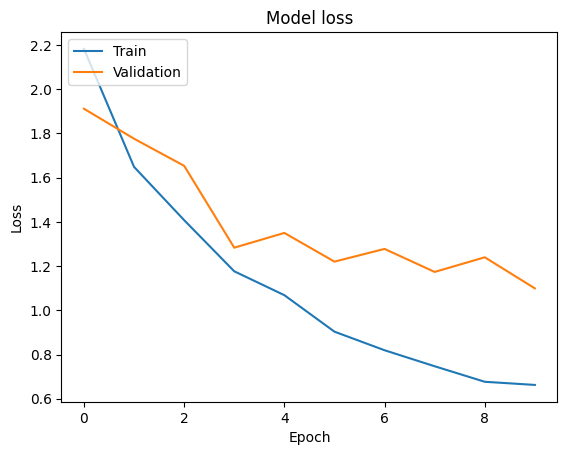

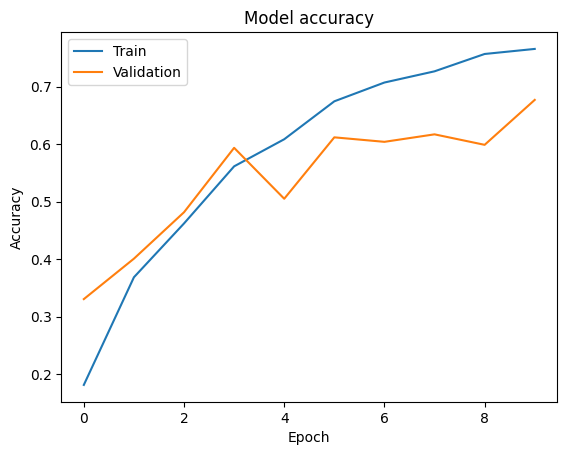

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


13/13 [==============================] - 13s 831ms/step


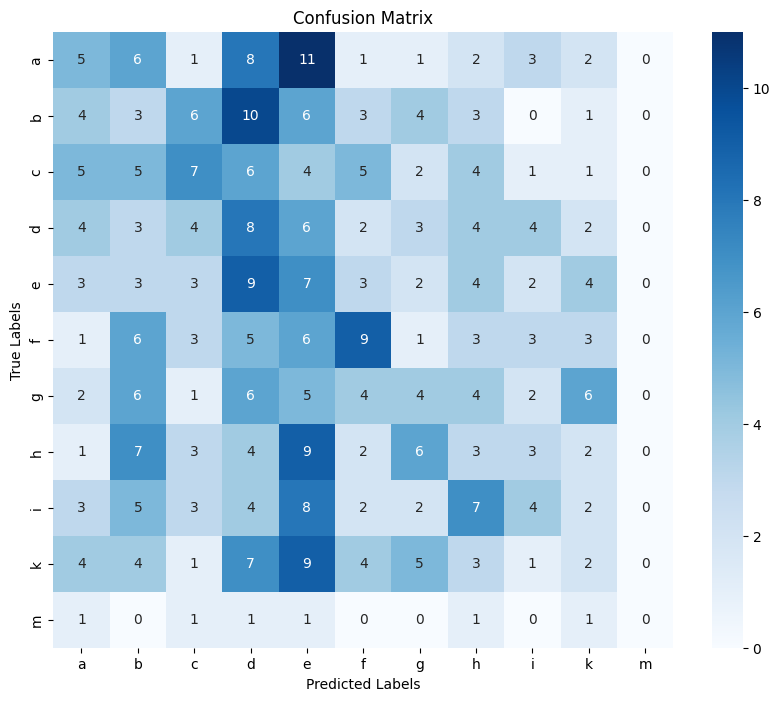

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the true labels for the validation set
true_labels = val_generator.classes

# Make predictions on the validation set
predictions = model.predict(val_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Compute classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)

# Print classification report
print("Classification Report:")
print(report)



Classification Report:
              precision    recall  f1-score   support

           a       0.15      0.12      0.14        40
           b       0.06      0.07      0.07        40
           c       0.21      0.17      0.19        40
           d       0.12      0.20      0.15        40
           e       0.10      0.17      0.12        40
           f       0.26      0.23      0.24        40
           g       0.13      0.10      0.11        40
           h       0.08      0.07      0.08        40
           i       0.17      0.10      0.13        40
           k       0.08      0.05      0.06        40
           m       0.00      0.00      0.00         6

    accuracy                           0.13       406
   macro avg       0.12      0.12      0.12       406
weighted avg       0.13      0.13      0.13       406



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


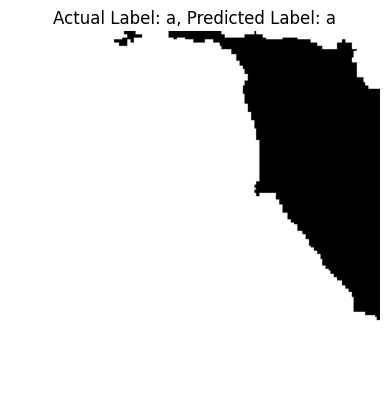

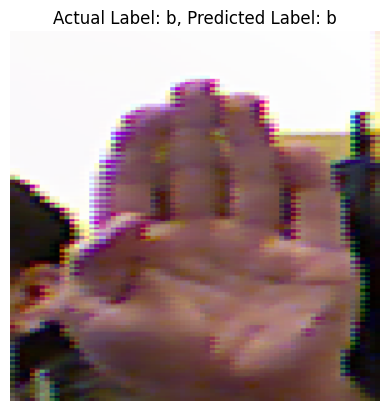

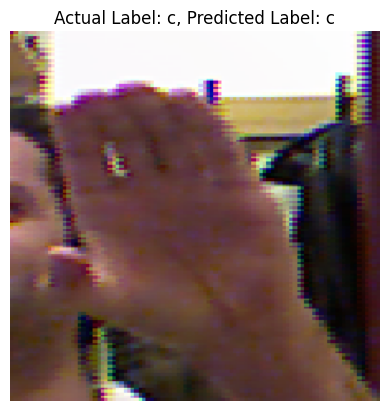

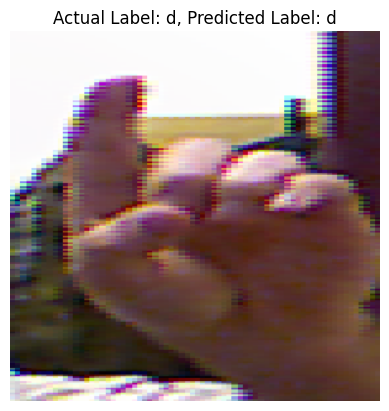

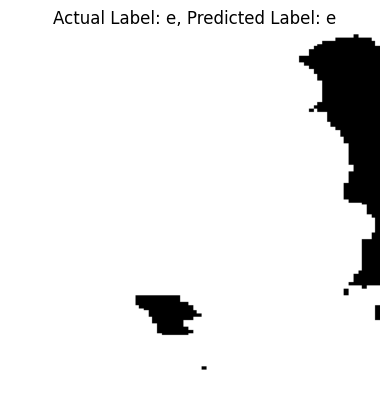

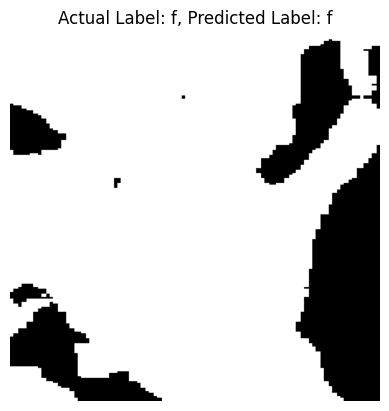

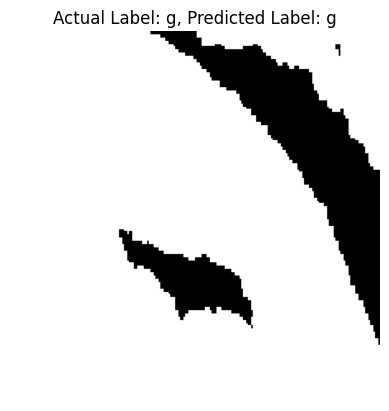

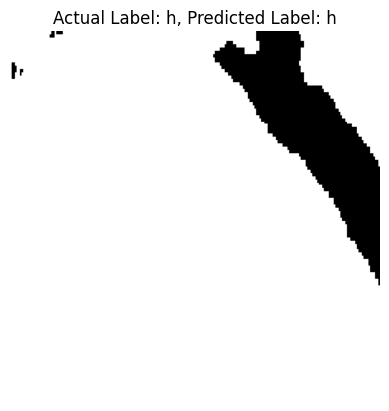

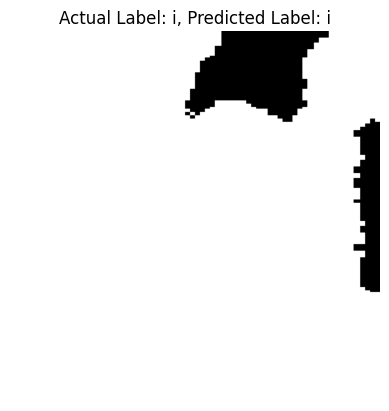

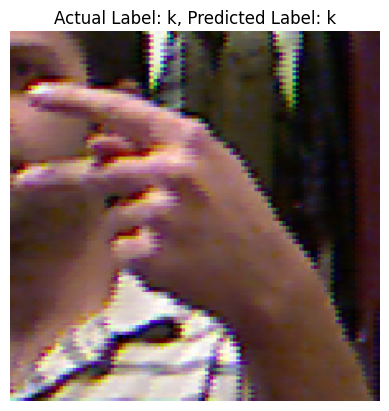

No image files found in class folder: l


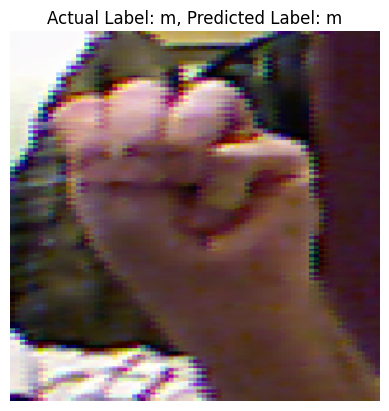

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Define the directory containing the test images
test_directory = "/content/drive/MyDrive/datasets/American Sign Language/RGB-depth/unzipped/dataset5/A"

# Get the list of subfolders (each subfolder represents a different class)
class_folders = os.listdir(test_directory)

# Iterate through each class folder
for class_folder in class_folders:
    class_path = os.path.join(test_directory, class_folder)

    # Get a list of image file names in the class folder
    image_files = os.listdir(class_path)

    # Check if there are any image files in the class folder
    if image_files:
        # Randomly select one image from the class folder
        selected_image = random.choice(image_files)

        # Construct the full path to the selected image file
        image_path = os.path.join(class_path, selected_image)

        # Load the image
        image = load_img(image_path, target_size=(224, 224))  # Adjust target_size as needed

        # Plot the image
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Actual Label: {class_folder}, Predicted Label: {class_folder}")  # Predicted label is the same as actual label for this case
        plt.show()
    else:
        print(f"No image files found in class folder: {class_folder}")


In [ ]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Define the directory containing the test images
test_directory = "/content/drive/MyDrive/datasets/American Sign Language/RGB-depth/unzipped/dataset5/A"

# Get the list of subfolders (each subfolder represents a different class)
class_folders = os.listdir(test_directory)

# Iterate through each class folder
for class_folder in class_folders:
    class_path = os.path.join(test_directory, class_folder)

    # Get a list of image file names in the class folder
    image_files = os.listdir(class_path)

    # Check if there are any image files in the class folder
    if image_files:
        # Iterate through each image in the class folder
        for image_file in image_files:
            # Construct the full path to the image file
            image_path = os.path.join(class_path, image_file)

            # Load the image
            image = load_img(image_path, target_size=(224, 224))  # Adjust target_size as needed

            # Make prediction on the image (you need to replace this with your model prediction code)
            predicted_label = "Predicted_Label"  # Replace this with actual prediction

            # Get the actual label from the class folder name
            actual_label = class_folder

            # Check if the predicted label matches the actual label
            if predicted_label != actual_label:
                # Plot the image
                plt.imshow(image)
                plt.axis('off')
                plt.title(f"Actual Label: {actual_label}, Predicted Label: {predicted_label}")
                plt.show()
    else:
        print(f"No image files found in class folder: {class_folder}")
